Feature Selection

In [1]:
import numpy as  np
import pandas as pd

In [2]:
from sklearn.preprocessing import LabelEncoder # it is to convert the string outputs into numbers
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df_phone = pd.read_csv(r'E:\eksauek\Feature Selection\HumanActivityRecgntn\train.csv')

In [4]:
df_phone.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,STANDING
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1,STANDING
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,1,STANDING
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,1,STANDING
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,1,STANDING


In [5]:
df_phone['Activity'].value_counts()

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

In [6]:
df_phone.shape
#7352 rows and 563 columns ,562 input and 1 output (Activity)

(7352, 563)

In [7]:
#Seperate X and Y now
X = df_phone.drop(columns = ['Activity'],axis = 1)
y = df_phone['Activity']

#encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
#spliting data into training and testing data
X_train,X_test,y_train , y_test = train_test_split(X, y , test_size=0.2 , random_state = 42)
#test_size = 0.2 means 20% is for test and 80% is for training
# Random state is so that we get same results always+

In [9]:
#Applying Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train,y_train)

#Making prediction on the test set
# y_pred = log_reg(X_test) - > wrong ,we are calling it likr a function
y_pred = log_reg.predict(X_test)

#calculating  accuracy
accuracy = accuracy_score(y_test,y_pred)
print("Test accuracy is",accuracy)

Test accuracy is 0.981645139360979


We might get convergence issues, to solve that we could scale the data

*  ~~~ python
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X_train_scaled, y_train)
    y_pred = log_reg.predict(X_test_scaled)
   ~~~ 
  

In [10]:
from sklearn.preprocessing import StandardScaler

#importing and using the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # X_train is scaled
X_test_scaled = scaler.transform(X_test) # X_test is scaled

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_scaled = log_reg.predict(X_test_scaled)

accuracy_scaled = accuracy_score(y_test,y_pred_scaled)
print("Test accuracy is",accuracy_scaled)

Test accuracy is 0.9830047586675731


Without scaling = 0.9816451  
With scaling = 0.9830047

In [19]:
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
57,0.278007,-0.017803,-0.108965,-0.994425,-0.994873,-0.994886,-0.994939,-0.993994,-0.995450,-0.938974,...,-0.684497,-0.901888,0.751089,0.626432,0.263401,-0.646225,0.398881,-0.546717,-0.431200,1
4154,0.237617,-0.000782,-0.114476,-0.326331,0.069663,-0.224321,-0.343326,0.039623,-0.256327,-0.310961,...,-0.131946,-0.591721,0.628099,-0.357089,-0.925512,0.110212,-0.474013,0.383162,0.238969,21
6945,0.290924,-0.050878,-0.073518,-0.026220,-0.032163,0.393109,-0.118256,-0.030279,0.432861,0.370607,...,-0.643660,-0.935668,-0.182993,0.484857,-0.961034,0.147325,-0.819001,0.221549,-0.003571,29
527,0.275268,-0.015050,-0.114204,-0.981092,-0.901124,-0.960423,-0.984417,-0.901405,-0.965788,-0.922291,...,-0.326860,-0.645937,0.205896,-0.168239,-0.197557,0.328892,-0.744428,0.274256,0.031246,3
4196,0.278790,-0.018585,-0.106908,-0.997380,-0.983893,-0.984482,-0.997331,-0.985196,-0.983768,-0.942062,...,-0.113724,-0.445144,-0.267371,-0.304399,-0.081555,0.110146,-0.615329,0.322236,0.161577,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0.278897,-0.030306,-0.096043,-0.555352,-0.104055,-0.438064,-0.572530,-0.112149,-0.429688,-0.479744,...,0.417731,0.200267,-0.155279,-0.137981,0.929236,-0.583898,-0.703989,0.159112,-0.185944,25
5226,0.289183,-0.049248,-0.125083,-0.290043,-0.212102,-0.469731,-0.307317,-0.209558,-0.528635,-0.283244,...,-0.021970,-0.360982,-0.019533,-0.896005,-0.039591,0.494178,-0.670139,0.106156,-0.220746,25
5390,0.293946,-0.018341,-0.119916,-0.627198,-0.216566,-0.424764,-0.648666,-0.253814,-0.417569,-0.547082,...,0.527152,0.348736,-0.414621,-0.488542,0.095895,-0.297162,-0.856512,0.183547,-0.034939,25
860,0.280475,-0.018976,-0.113756,-0.994825,-0.985314,-0.965857,-0.995170,-0.984285,-0.963293,-0.937503,...,-0.889671,-0.984051,-0.079515,0.014291,-0.290347,0.602344,-0.839693,0.081388,-0.098270,5


In [17]:
X_train.loc[:,~X_train.columns.duplicated(keep = 'First')] # not helping at all

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
57,0.278007,-0.017803,-0.108965,-0.994425,-0.994873,-0.994886,-0.994939,-0.993994,-0.995450,-0.938974,...,-0.684497,-0.901888,0.751089,0.626432,0.263401,-0.646225,0.398881,-0.546717,-0.431200,1
4154,0.237617,-0.000782,-0.114476,-0.326331,0.069663,-0.224321,-0.343326,0.039623,-0.256327,-0.310961,...,-0.131946,-0.591721,0.628099,-0.357089,-0.925512,0.110212,-0.474013,0.383162,0.238969,21
6945,0.290924,-0.050878,-0.073518,-0.026220,-0.032163,0.393109,-0.118256,-0.030279,0.432861,0.370607,...,-0.643660,-0.935668,-0.182993,0.484857,-0.961034,0.147325,-0.819001,0.221549,-0.003571,29
527,0.275268,-0.015050,-0.114204,-0.981092,-0.901124,-0.960423,-0.984417,-0.901405,-0.965788,-0.922291,...,-0.326860,-0.645937,0.205896,-0.168239,-0.197557,0.328892,-0.744428,0.274256,0.031246,3
4196,0.278790,-0.018585,-0.106908,-0.997380,-0.983893,-0.984482,-0.997331,-0.985196,-0.983768,-0.942062,...,-0.113724,-0.445144,-0.267371,-0.304399,-0.081555,0.110146,-0.615329,0.322236,0.161577,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0.278897,-0.030306,-0.096043,-0.555352,-0.104055,-0.438064,-0.572530,-0.112149,-0.429688,-0.479744,...,0.417731,0.200267,-0.155279,-0.137981,0.929236,-0.583898,-0.703989,0.159112,-0.185944,25
5226,0.289183,-0.049248,-0.125083,-0.290043,-0.212102,-0.469731,-0.307317,-0.209558,-0.528635,-0.283244,...,-0.021970,-0.360982,-0.019533,-0.896005,-0.039591,0.494178,-0.670139,0.106156,-0.220746,25
5390,0.293946,-0.018341,-0.119916,-0.627198,-0.216566,-0.424764,-0.648666,-0.253814,-0.417569,-0.547082,...,0.527152,0.348736,-0.414621,-0.488542,0.095895,-0.297162,-0.856512,0.183547,-0.034939,25
860,0.280475,-0.018976,-0.113756,-0.994825,-0.985314,-0.965857,-0.995170,-0.984285,-0.963293,-0.937503,...,-0.889671,-0.984051,-0.079515,0.014291,-0.290347,0.602344,-0.839693,0.081388,-0.098270,5


In [18]:
X_train[['tBodyAccMag-mean()','tBodyAccMag-sma()','tGravityAccMag-mean()','tGravityAccMag-sma()']]

,tBodyAccMag-mean(),tBodyAccMag-sma(),tGravityAccMag-mean(),tGravityAccMag-sma()
57,-0.997420,-0.997420,-0.997420,-0.997420
4154,-0.133797,-0.133797,-0.133797,-0.133797
6945,0.130528,0.130528,0.130528,0.130528
527,-0.955222,-0.955222,-0.955222,-0.955222
4196,-0.992499,-0.992499,-0.992499,-0.992499
...,...,...,...,...
5191,-0.372758,-0.372758,-0.372758,-0.372758
5226,-0.256033,-0.256033,-0.256033,-0.256033
5390,-0.434138,-0.434138,-0.434138,-0.434138
860,-0.983969,-0.983969,-0.983969,-0.983969


In [20]:
# Above method isnt workign so custom function 


#Function to remove detect all duplicate columns 
def get_duplicate_columns(df):
    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try: # if given column is  Numpy array,then converted to bytes
            current_column_hash = current_column.values.tobytes()
        except AttributeError: # works for non numpy array ,converts to string and then encode
            current_column_hash = current_column.to_string().encode()
    
        #For belwo code check explanation
        if current_column_hash in seen_columns: # current col is dup
            if seen_columns[current_column_hash] in duplicate_columns: 
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

* The function then checks if the hash value of the current column `python (current_column_hash)` is already present in the seen_columns dictionary:  
* If `current_column_hash` is in `seen_columns` , it means the current column is a duplicate of a previously seen column.  
* If the previously seen column name `(seen_columns[current_column_hash])` is already a key in duplicate_columns, the current column name is appended to the list of duplicate columns for that key.  

* Otherwise, a new key-value pair is added to `duplicate_columns`, where the key is the previously seen column name, and the value is a list containing the current column name.  
* If `current_column_hash`  is not in `seen_columns`, it means the current column is unique. The function adds a new key-value pair to `seen_columns`, where the key is `current_column_hash`, and the value is the current column name.  
* Finally, the function returns the `duplicate_columns` dictionary, which contains the duplicate column names grouped by their unique values.  

In [22]:
duplicate_columns = get_duplicate_columns(X_train)

In [ ]:
duplicate_columns

In [ ]:
for one_list in duplicate_columns.values(): #dropping all duplicate columns
    X_train.drop(columns=one_list,inplace=True)
    X_test.drop(columns=one_list,inplace=True)

In [24]:
X_train.shape

(5881, 541)

### 1. Variance threshold  Method

In [27]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold = 0.05)
sel.fit(X_train)
 # applying VarianceThreshold to X_train so we filter all the columns with less variance

VarianceThreshold(threshold=0.05)

In [28]:
sum(sel.get_support()) #it means 350 col are left that have threshold value above 0.05

350

In [29]:
# storing all the cols with var greater than threshold in columns
columns = X_train.columns[sel.get_support()]

In [30]:
X_train = sel.fit_transform(X_train)
X_test = sel.transform(X_test)

# Now we have tranformed training and testing dataset with removed columns,
# Columns which had 0 variance using VarianceThreshold
X_train = pd.DataFrame(X_train) 
X_test = pd.DataFrame(X_test)

In [31]:
print(X_train.shape)
print(X_test.shape)

(5881, 350)
(1471, 350)


## 2. Correlation 

In [32]:
import seaborn as sns

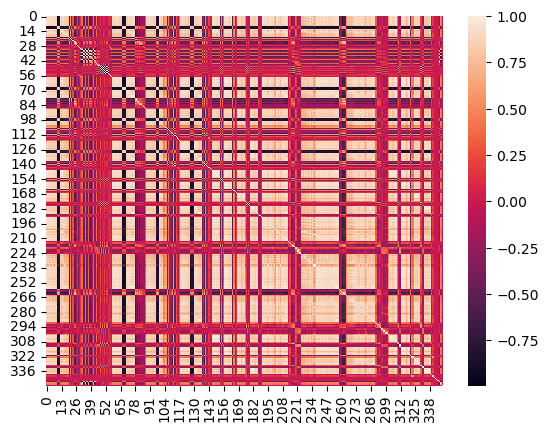

In [34]:
sns.heatmap(X_train.corr());
#its very hard to judge from this graph

In [36]:
corr_matrix = X_train.corr()

In [42]:
# getting the column names of the correlation matrix
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []

# Loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i], columns[j]] > 0.95:
            columns_to_drop.append(columns[j])

print(len(columns_to_drop))

1508


In [44]:
columns_to_drop = set(columns_to_drop) # converting to set bcuz columns are repeating

In [46]:
len(columns_to_drop)

197

In [47]:
X_train.drop(columns = columns_to_drop , axis = 1, inplace = True)
X_test.drop(columns = columns_to_drop , axis = 1, inplace = True)

In [49]:
print(X_train.shape)
print(X_test.shape) # now using correlation its reduced to 152 columns

(5881, 153)
(1471, 153)


### 3. ANOVA